In [50]:
# imports
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from deepymod.analysis import load_tensorboard
from natsort import natsorted

In [51]:
# settings
sns.set(context='paper', style='white')
col_width = 5.5 # neurips style column width in inches

# Single run plot

In [55]:
df_pinn = load_tensorboard("runs/pinn_run_0/")
df_bayes = load_tensorboard("runs/SBL_run_0/")

In [56]:
coeff_keys_pinn = natsorted(filter(lambda key: key.find('coeff') == 0, df_pinn.keys()))
coeff_keys_bayes = natsorted(filter(lambda key: key.find('coeffs') == 0, df_bayes.keys()))
prior_keys = natsorted(filter(lambda key: key.find('alpha') == 0, df_bayes.keys()))

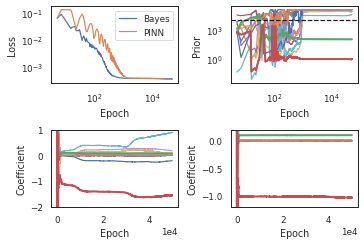

In [72]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(0.9 * col_width, 0.6 * col_width), constrained_layout=True)

ax = axes[0, 0]
ax.plot(df_bayes.index, df_bayes.mse + df_bayes.reg, label="Bayes")
ax.plot(df_pinn.index, df_pinn.mse + df_pinn.reg, label="PINN")
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Epoch')
ax.set_ylabel("Loss")
#ax.ticklabel_format(axis='x', style='sci', scilimits=[0, 0])
ax.legend()


ax = axes[0, 1]
ax.plot(df_bayes.index, df_bayes[prior_keys])
ax.plot(df_bayes.index, df_bayes[prior_keys[2]], lw=2)
ax.plot(df_bayes.index, df_bayes[prior_keys[5]], lw=2)
ax.axhline(1e4, color='k', linestyle='--')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Epoch')
ax.set_ylabel("Prior")
#ax.ticklabel_format(axis='x', style='sci', scilimits=[0, 0])


ax = axes[1, 0]
ax.plot(df_pinn.index, df_pinn[coeff_keys_pinn])
ax.plot(df_pinn.index, df_pinn[coeff_keys_pinn[2]], lw=2)
ax.plot(df_pinn.index, df_pinn[coeff_keys_pinn[5]], lw=2)
#ax.set_yscale('symlog')
#ax.set_xscale('log')
ax.set_xlabel('Epoch')
ax.set_ylim([-2, 1])
ax.set_ylabel("Coefficient")
ax.ticklabel_format(axis='x', style='sci', scilimits=[0, 0])


ax = axes[1, 1]
ax.plot(df_bayes.index, df_bayes[coeff_keys_bayes])
ax.plot(df_bayes.index, df_bayes[coeff_keys_bayes[2]], lw=2)
ax.plot(df_bayes.index, df_bayes[coeff_keys_bayes[5]], lw=2)
#ax.set_yscale('symlog')
#ax.set_xscale('log')
ax.set_xlabel('Epoch')
ax.set_ylim([-1.2, 0.2])
ax.set_ylabel("Coefficient")
ax.ticklabel_format(axis='x', style='sci', scilimits=[0, 0])

plt.savefig('SBL.pdf', bbox_inches='tight')

In [ ]:
coeff_keys_pinn

In [ ]:
plt.semilogy(df_bayes.its)

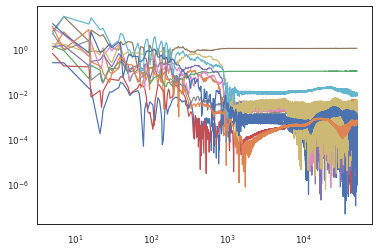

In [61]:
plt.loglog(df_bayes.index, np.abs(df_bayes[coeff_keys_bayes]))

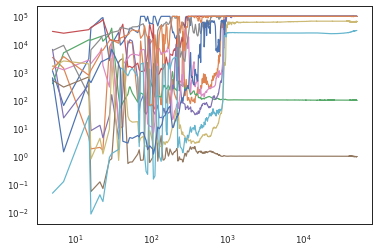

In [68]:
plt.loglog(df_bayes.index, np.abs(df_bayes[prior_keys]))

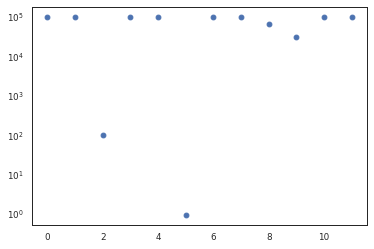

In [67]:
plt.semilogy(df_bayes[prior_keys].tail(1).to_numpy().squeeze(), 'o')